<a href="https://colab.research.google.com/github/christos8566/freecodecamp_data_analysis.res/blob/main/pandas_lessons/3%23pandas_DataFrame_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PANDAS DATAFRAMES**
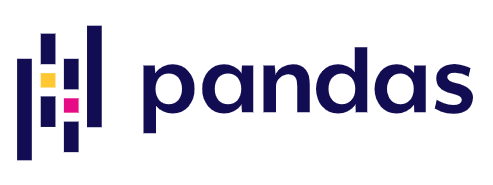


Probably the most important data structure of pandas is the DataFrame. It's a tabular structure tightly integrated with Series.


# A. Import libraries

In [121]:
import pandas as pd
print('pandas', pd.__version__)

import numpy as np
print('numpy', np.__version__)

pandas 1.5.3
numpy 1.25.2


We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate here):

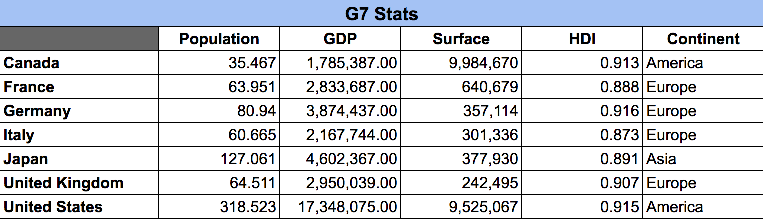



# B. Create DataFrame

Creating DataFrames manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, you can create a DataFrame by specifying the columns and values:



In [122]:
df = pd.DataFrame({
    'Population' : [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    'GDP' : [1_785_387, 2_833_687, 3_874_437, 2_167_744, 4_602_367, 2_950_039, 17_348_075],
    'Surface' : [9_984_670, 640_679, 357_114, 301_336, 377_930, 242_495, 9_525_067],
    'HDI' : [0.913, 0.888, 0.916, 0.873, 0.891, 0.907, 0.915],
    'Continent' : ['America', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'America']
},
                  columns = ['Population', 'GDP', 'Surface', 'HDI', 'Continent'])

(The columns attribute is optional. I'm using it to keep the same order as in the picture above)

In [123]:
df

,Population,GDP,Surface,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


DataFrames also have indexes. As you can see in the "table" above, pandas has assigned a numeric, autoincremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [124]:
df.index = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United State']
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United State,318.523,17348075,9525067,0.915,America


In [125]:
df['GDP'] = df['GDP'].astype(np.float64)
df


,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


# C. A fitst snapshot of the data

## C1. Return the column names

In [126]:
df.columns

Index(['Population', 'GDP', 'Surface', 'HDI', 'Continent'], dtype='object')

## C2. Return the shape of the DataFrame

In [127]:
df.shape

(7, 5)

## C3. Return the index names

In [128]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United State'],
      dtype='object')

## C4. Return the ***info*** of the DataFrame

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United State
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  7 non-null      float64
 1   GDP         7 non-null      float64
 2   Surface     7 non-null      int64  
 3   HDI         7 non-null      float64
 4   Continent   7 non-null      object 
dtypes: float64(3), int64(1), object(1)
memory usage: 336.0+ bytes


## C5. Return the ***size*** of the DataFrame

In [130]:
df.size

35

## C6. Return the ***describe*** of the DataFrame

In [131]:
df.describe()

,Population,GDP,Surface,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


## C7. Return the ***dtypes*** of the DataFrame

In [132]:
df.dtypes

Population    float64
GDP           float64
Surface         int64
HDI           float64
Continent      object
dtype: object

## C8. Return the ***value_counts*** of the DataFrame

In [133]:
df.value_counts()

Population  GDP         Surface  HDI    Continent
35.467      1785387.0   9984670  0.913  America      1
60.665      2167744.0   301336   0.873  Europe       1
63.951      2833687.0   640679   0.888  Europe       1
64.511      2950039.0   242495   0.907  Europe       1
80.940      3874437.0   357114   0.916  Europe       1
127.061     4602367.0   377930   0.891  Asia         1
318.523     17348075.0  9525067  0.915  America      1
dtype: int64

# D. Indexing, Selection and Slicing


## D1. Selection by index

Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a Series:



In [134]:
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [135]:
df.loc['Canada']                    # select the Canada elements with the loc

Population       35.467
GDP           1785387.0
Surface         9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [136]:
df.iloc[-1]                         # select the United Stated elemants with the iloc

Population       318.523
GDP           17348075.0
Surface          9525067
HDI                0.915
Continent        America
Name: United State, dtype: object

## D2. Selection by column

In [137]:
#df.Population
df['Population']

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United State      318.523
Name: Population, dtype: float64

Note that the ***index*** of the returned Series is the same as the DataFrame one. And its name is the name of the column. If you're working on a notebook and want to see a more DataFrame-like format you **can** use the to_frame method:



In [138]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United State,318.523


Multiple columns can also be selected similarly to numpy and Series:



In [139]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387.0
France,63.951,2833687.0
Germany,80.940,3874437.0
Italy,60.665,2167744.0
Japan,127.061,4602367.0
United Kingdom,64.511,2950039.0
United State,318.523,17348075.0


## D3. Slicing

In this case, the result is another DataFrame. Slicing works differently, it acts at "row level", and can be counter intuitive:



In [140]:
df[1:3]

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe


Row level selection works better with `loc` and `iloc` **which are recommended** over regular "direct slicing" `(df[:])`.

`loc` selects rows matching the given index:

In [141]:
df.loc['Italy']

Population       60.665
GDP           2167744.0
Surface          301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [142]:
df.loc['France' : 'Italy']                      # in this case the last column inclunded

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe


As a second "argument", you can pass the column(s) you'd like to select:



In [143]:
df.loc['France' : 'Italy', 'Population' : 'Surface']

,Population,GDP,Surface
France,63.951,2833687.0,640679
Germany,80.940,3874437.0,357114
Italy,60.665,2167744.0,301336


In [144]:
df.loc['France' : 'Italy', ['Population', 'Continent']]

,Population,Continent
France,63.951,Europe
Germany,80.940,Europe
Italy,60.665,Europe


## D4. Slicing with iloc

`iloc` works with the (numeric) "position" of the index:



In [145]:
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [146]:
df.iloc[0]#.to_frame()

Population       35.467
GDP           1785387.0
Surface         9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [147]:
df.iloc[-1]#.to_frame()

Population       318.523
GDP           17348075.0
Surface          9525067
HDI                0.915
Continent        America
Name: United State, dtype: object

In [148]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [149]:
df.iloc[1:3]

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe


In [150]:
df.iloc[1:3, 3]#.to_frame()

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [151]:
df.iloc[1:3, :3]

,Population,GDP,Surface
France,63.951,2833687.0,640679
Germany,80.940,3874437.0,357114


In [152]:
df.iloc[1:3, 1:3]

,GDP,Surface
France,2833687.0,640679
Germany,3874437.0,357114


RECOMMENDED: Always use loc and iloc to reduce ambiguity, specially with DataFrames with numeric indexes.



# E. Conditional selection (boolean arrays)

We saw conditional selection applied to Series and it'll work in the same way for DataFrames. After all, a DataFrame is a collection of Series:



In [153]:
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [154]:
# See which countries have population greater than 70 million
df['Population'] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United State       True
Name: Population, dtype: bool

In [155]:
# Select the countries wiht a population greater than 70 million
df.loc[df['Population'] > 70]

,Population,GDP,Surface,HDI,Continent
Germany,80.940,3874437.0,357114,0.916,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United State,318.523,17348075.0,9525067,0.915,America


The boolean matching is done at Index level, so you can filter by any row, as long as it contains the right indexes. Column selection still works as expected:



In [156]:
# Select population and GDP columns for countries with a population greater than 70 million
df.loc[df['Population'] > 70, ['Population', 'GDP']]

,Population,GDP
Germany,80.940,3874437.0
Japan,127.061,4602367.0
United State,318.523,17348075.0


# F. Dropping staff

Opposed to the concept of selection, we have "dropping". Instead of pointing out which values you'd like to select you could point which ones you'd like to `drop`:



## F1. Drop rows

Use the drop function selecting the index we want to delete

In [157]:
# Delete Canada records
df.drop('Canada')

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [158]:
# Delete records of Canada and Japan
df.drop(['Canada', 'Japan'])

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


## F2. Drop columns

If we want delete columns then in the drop function we write `columns = column_name`

In [159]:
# delete the population and GDP columns
df.drop(columns = ['Population', 'GDP'])

,Surface,HDI,Continent
Canada,9984670,0.913,America
France,640679,0.888,Europe
Germany,357114,0.916,Europe
Italy,301336,0.873,Europe
Japan,377930,0.891,Asia
United Kingdom,242495,0.907,Europe
United State,9525067,0.915,America


## F3. Drop items with specifying the axis

In [160]:
# delete the Italy and Canada records
df.drop(['Italy', 'Canada'], axis = 0)          # 0 = vertical
                                                # 1 = horizontal

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [161]:
# delete the population and GDP columns
df.drop(['Population', 'GDP'], axis = 1)

,Surface,HDI,Continent
Canada,9984670,0.913,America
France,640679,0.888,Europe
Germany,357114,0.916,Europe
Italy,301336,0.873,Europe
Japan,377930,0.891,Asia
United Kingdom,242495,0.907,Europe
United State,9525067,0.915,America


In [162]:
df.drop(['Population', 'GDP'], axis = 'columns')

,Surface,HDI,Continent
Canada,9984670,0.913,America
France,640679,0.888,Europe
Germany,357114,0.916,Europe
Italy,301336,0.873,Europe
Japan,377930,0.891,Asia
United Kingdom,242495,0.907,Europe
United State,9525067,0.915,America


In [163]:
df.drop(['Germany', 'Italy'], axis = 'rows')

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


All these `drop` methods return a `new DataFrame`. If you'd like to modify it "in place", you can use the `inplace` attribute (there's an example below).



# D. Operations

In [164]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387.0
France,63.951,2833687.0
Germany,80.940,3874437.0
Italy,60.665,2167744.0
Japan,127.061,4602367.0
United Kingdom,64.511,2950039.0
United State,318.523,17348075.0


In [165]:
df[['Population', 'GDP']] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United State,3.18523,173480.75


**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).



In [166]:
crisis = pd.Series([-1_000_000, -0.3],
                   index = ['GDP', 'HDI'])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [167]:
df[['GDP', 'HDI']]

,GDP,HDI
Canada,1785387.0,0.913
France,2833687.0,0.888
Germany,3874437.0,0.916
Italy,2167744.0,0.873
Japan,4602367.0,0.891
United Kingdom,2950039.0,0.907
United State,17348075.0,0.915


In [168]:
df[['GDP', 'HDI']] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United State,16348075.0,0.615


# Ε. Modifying DataFrames

It's simple and intuitive, You can add columns, or replace values for columns without issues:



## E1. Adding a new column

In [169]:
langs = pd.Series([
    'Frensh', 'Italian', 'German'
], index = [
    'France', 'Italy', 'Germany'
], name = 'language')
langs

France      Frensh
Italy      Italian
Germany     German
Name: language, dtype: object

In [170]:
df['language'] = langs
df

,Population,GDP,Surface,HDI,Continent,language
Canada,35.467,1785387.0,9984670,0.913,America,NaN
France,63.951,2833687.0,640679,0.888,Europe,Frensh
Germany,80.940,3874437.0,357114,0.916,Europe,German
Italy,60.665,2167744.0,301336,0.873,Europe,Italian
Japan,127.061,4602367.0,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039.0,242495,0.907,Europe,NaN
United State,318.523,17348075.0,9525067,0.915,America,NaN


## E2. Replacing values per column


In [171]:
# replace the language column values with the value English
df['language'] = 'English'
df                                      #df.loc[df['language'] == 'English', 'language'] = 'German'

,Population,GDP,Surface,HDI,Continent,language
Canada,35.467,1785387.0,9984670,0.913,America,English
France,63.951,2833687.0,640679,0.888,Europe,English
Germany,80.940,3874437.0,357114,0.916,Europe,English
Italy,60.665,2167744.0,301336,0.873,Europe,English
Japan,127.061,4602367.0,377930,0.891,Asia,English
United Kingdom,64.511,2950039.0,242495,0.907,Europe,English
United State,318.523,17348075.0,9525067,0.915,America,English


## E3. Renaming Columns

Renaming columns with the pandas function `rename`,

insite the function we write the current name and the new name as a dictionary.

In [172]:
df.rename(
    columns = {
    'HDI' : 'Human Development Index',
    'Anual Popcorn Consumption' : 'APC',
}, index = {
    'United State' : 'USA',
    'United Kingdom' : 'UK',
    'Argentina' : 'AR'
}
)
df

,Population,GDP,Surface,HDI,Continent,language
Canada,35.467,1785387.0,9984670,0.913,America,English
France,63.951,2833687.0,640679,0.888,Europe,English
Germany,80.940,3874437.0,357114,0.916,Europe,English
Italy,60.665,2167744.0,301336,0.873,Europe,English
Japan,127.061,4602367.0,377930,0.891,Asia,English
United Kingdom,64.511,2950039.0,242495,0.907,Europe,English
United State,318.523,17348075.0,9525067,0.915,America,English


In [173]:
df.rename(index = str.upper)        # convert the index values from lowercase to uppercase

,Population,GDP,Surface,HDI,Continent,language
CANADA,35.467,1785387.0,9984670,0.913,America,English
FRANCE,63.951,2833687.0,640679,0.888,Europe,English
GERMANY,80.940,3874437.0,357114,0.916,Europe,English
ITALY,60.665,2167744.0,301336,0.873,Europe,English
JAPAN,127.061,4602367.0,377930,0.891,Asia,English
UNITED KINGDOM,64.511,2950039.0,242495,0.907,Europe,English
UNITED STATE,318.523,17348075.0,9525067,0.915,America,English


In [174]:
df.rename(index = lambda x: x.lower())        # convert the index values in lowercase

,Population,GDP,Surface,HDI,Continent,language
canada,35.467,1785387.0,9984670,0.913,America,English
france,63.951,2833687.0,640679,0.888,Europe,English
germany,80.940,3874437.0,357114,0.916,Europe,English
italy,60.665,2167744.0,301336,0.873,Europe,English
japan,127.061,4602367.0,377930,0.891,Asia,English
united kingdom,64.511,2950039.0,242495,0.907,Europe,English
united state,318.523,17348075.0,9525067,0.915,America,English


## E4. Dropping columns

In [175]:
df.drop(columns = 'language', inplace = True)         # with `inplace` the changes are saved
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


## E5. Adding values

In [176]:

df.loc[len(df.index)] = [3, 5, 0, 0, 'Asia']

df = df.rename(index = {
    7 : 'China'
})
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America
China,3.000,5.0,0,0.000,Asia


In [178]:
df.loc['China', 'Population'] = 1400000000
df

,Population,GDP,Surface,HDI,Continent
Canada,3.546700e+01,1785387.0,9984670,0.913,America
France,6.395100e+01,2833687.0,640679,0.888,Europe
Germany,8.094000e+01,3874437.0,357114,0.916,Europe
Italy,6.066500e+01,2167744.0,301336,0.873,Europe
Japan,1.270610e+02,4602367.0,377930,0.891,Asia
United Kingdom,6.451100e+01,2950039.0,242495,0.907,Europe
United State,3.185230e+02,17348075.0,9525067,0.915,America
China,1.400000e+09,5.0,0,0.000,Asia


## E6. Dropping rows

In [180]:
df.drop(index = 'China', inplace = True)
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


## E7 More radical index changes


In [181]:
df.reset_index()

,index,Population,GDP,Surface,HDI,Continent
0,Canada,35.467,1785387.0,9984670,0.913,America
1,France,63.951,2833687.0,640679,0.888,Europe
2,Germany,80.940,3874437.0,357114,0.916,Europe
3,Italy,60.665,2167744.0,301336,0.873,Europe
4,Japan,127.061,4602367.0,377930,0.891,Asia
5,United Kingdom,64.511,2950039.0,242495,0.907,Europe
6,United State,318.523,17348075.0,9525067,0.915,America


In [182]:
df.set_index('Population')

,GDP,Surface,HDI,Continent
Population,,,,
35.467,1785387.0,9984670,0.913,America
63.951,2833687.0,640679,0.888,Europe
80.940,3874437.0,357114,0.916,Europe
60.665,2167744.0,301336,0.873,Europe
127.061,4602367.0,377930,0.891,Asia
64.511,2950039.0,242495,0.907,Europe
318.523,17348075.0,9525067,0.915,America


# F. Creating columns from other columns

Altering a DataFrame often involves combining different columns into another. For example, in our Countries analysis, we could try to calculate the "GDP per capita", which is just, `GDP / Population`.



In [186]:
df['GDP per capital'] = (df['GDP'] / df['Population']).round(2)
df

,Population,GDP,Surface,HDI,Continent,GDP per capital
Canada,35.467,1785387.0,9984670,0.913,America,50339.39
France,63.951,2833687.0,640679,0.888,Europe,44310.28
Germany,80.940,3874437.0,357114,0.916,Europe,47868.01
Italy,60.665,2167744.0,301336,0.873,Europe,35733.03
Japan,127.061,4602367.0,377930,0.891,Asia,36221.71
United Kingdom,64.511,2950039.0,242495,0.907,Europe,45729.24
United State,318.523,17348075.0,9525067,0.915,America,54464.12


# G. Statistical info


In [187]:
df.describe()

,Population,GDP,Surface,HDI,GDP per capital
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429,44952.254286
std,97.249970,5.494020e+06,4.576187e+06,0.016592,6954.983701
min,35.467000,1.785387e+06,2.424950e+05,0.873000,35733.030000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500,40265.995000
50%,64.511000,2.950039e+06,3.779300e+05,0.907000,45729.240000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000,49103.700000
max,318.523000,1.734808e+07,9.984670e+06,0.916000,54464.120000


In [190]:
population = df['Population']

population.max(), population.min()

(318.523, 35.467)

In [191]:
population.sum()

751.118

In [192]:
population.sum() / len(population)

107.30257142857144

In [194]:
population.mean()

107.30257142857144

In [195]:
population.median()

64.511

In [196]:
population.std()

97.24996987121581

In [197]:
population.describe()

count      7.000000
mean     107.302571
std       97.249970
min       35.467000
25%       62.308000
50%       64.511000
75%      104.000500
max      318.523000
Name: Population, dtype: float64

In [203]:
population.quantile(.33)

63.88528